# Assignment No. 5: Sentiment Analysis on Twitter Data

This notebook focuses on performing sentiment analysis on Twitter data, a core task in Artificial Intelligence and Natural Language Processing. It involves data loading, text preprocessing, sentiment classification, and result visualization.

**Task:**
Download a dataset of tweets (e.g., from Kaggle or Twitter API). Preprocess the text (tokenization, stop word removal, stemming/lemmatization). Categorize the tweets into "positive," "negative," and "neutral" using pre-trained models or simple classifiers like Logistic Regression. Visualize the results using word clouds or bar charts.


--- Checking NLTK Data Downloads ---
Attempting to download NLTK resource: 'stopwords'...
Successfully ensured 'stopwords' is available.
Attempting to download NLTK resource: 'wordnet'...
Successfully ensured 'wordnet' is available.
Attempting to download NLTK resource: 'punkt'...
Successfully ensured 'punkt' is available.
Attempting to download NLTK resource: 'punkt_tab'...
Successfully ensured 'punkt_tab' is available.
--- NLTK Data Setup Complete ---

Data loaded successfully (51 tweets loaded).

Processed Tweets Sample:
                                               tweet  \
0  I love this new product! It's amazing and so u...   
1  This is terrible. I'm so disappointed with the...   
2  The weather today is quite neutral, neither go...   
3                Great experience, highly recommend!   
4             Worst day ever. Everything went wrong.   

                                processed_tweet  
0               love new product amazing useful  
1                 terrible disap

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saadc\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\saadc\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\saadc\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saadc\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


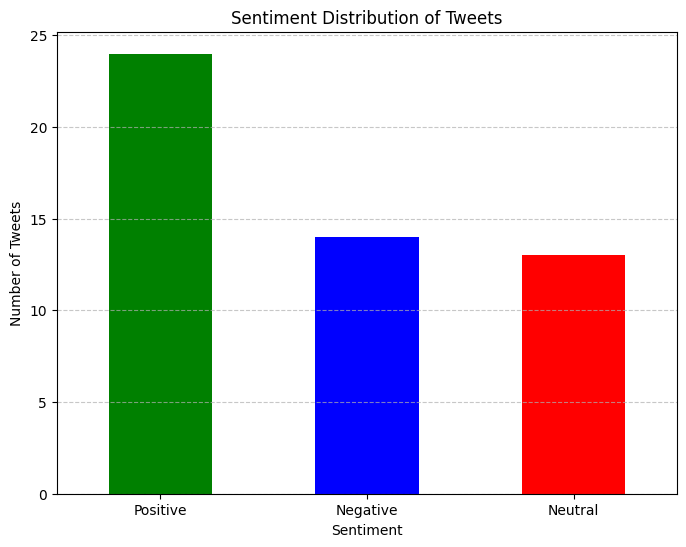

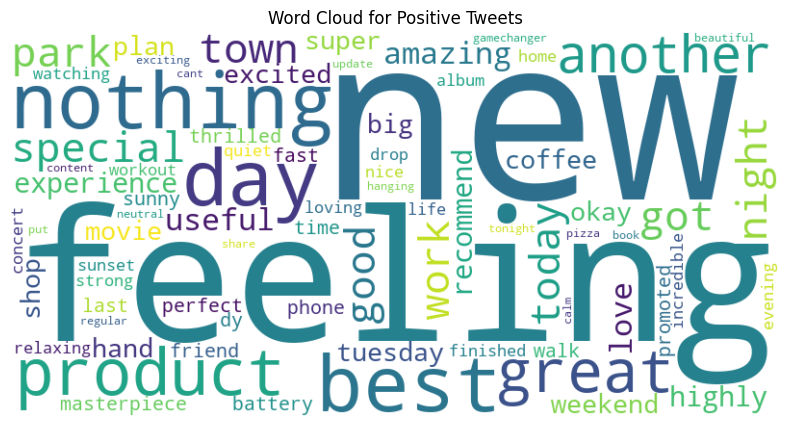

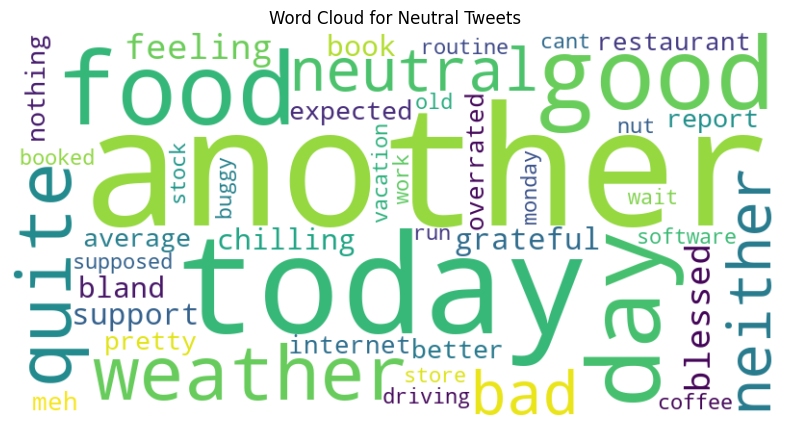

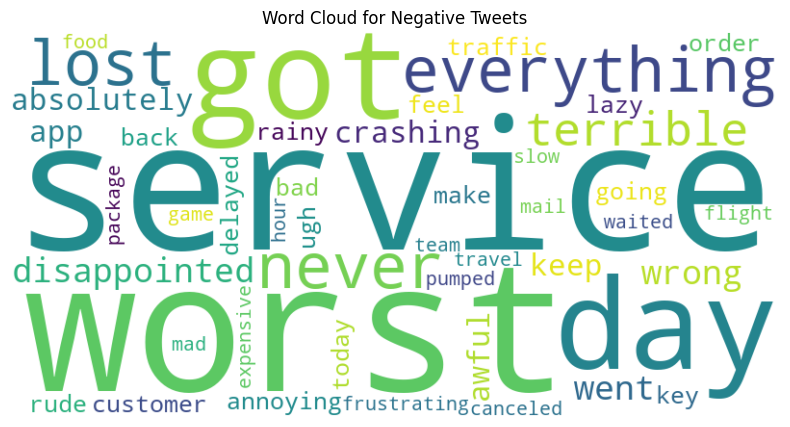


Analysis complete!


In [2]:
import pandas as pd
import numpy as np
import re
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# --- Setup: Install Libraries and Download NLTK Data ---
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'nltk_data')

if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

if nltk_data_dir not in nltk.data.path:
    nltk.data.path.append(nltk_data_dir)

print("\n--- Checking NLTK Data Downloads ---")
resources_to_download = ['stopwords', 'wordnet', 'punkt', 'punkt_tab']
for resource in resources_to_download:
    try:
        print(f"Attempting to download NLTK resource: '{resource}'...")
        nltk.download(resource, download_dir=nltk_data_dir, quiet=False)
        print(f"Successfully ensured '{resource}' is available.")
    except Exception as e:
        print(f"Error downloading '{resource}': {e}")

print("--- NLTK Data Setup Complete ---\n")

try:
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
except LookupError as e:
    print(f"Error initializing NLP resources: {e}")
    print("Please ensure all NLTK resources are downloaded correctly.")
    exit()

# --- 1. Data Loading ---
try:
    tweets = [
        "I love this new product! It's amazing and so useful. #positive #happy",
        "This is terrible. I'm so disappointed with the service. #negative #frustrated",
        "The weather today is quite neutral, neither good nor bad.",
        "Great experience, highly recommend!",
        "Worst day ever. Everything went wrong.",
        "Just another Tuesday. Nothing special.",
        "Feeling blessed and grateful for all the support.",
        "Absolutely awful, never again.",
        "It is what it is.",
        "Super excited for the weekend! Got big plans! #excited",
        "This app keeps crashing, so annoying! #fail",
        "Just chilling with a good book today.",
        "Best coffee shop in town, hands down! #love",
        "Why is traffic so bad today? Ugh! #stressed",
        "Feeling okay, just another day at work.",
        "The new movie was a masterpiece! #mustwatch",
        "Customer service was rude, never going back.",
        "Sunny day, perfect for a walk in the park.",
        "This phone battery dies so fast! #disappointed",
        "Had a great time with friends last night! #grateful",
        "Rainy days make me feel so lazy. #meh",
        "Just got promoted at work! So thrilled! #success",
        "The food was bland, expected better. #notimpressed",
        "Watching the sunset, life is good.",
        "Lost my keys again, this is the worst! #ugh",
        "Pretty average day, nothing to report.",
        "The concert was incredible! Best night ever! #music",
        "My order got delayed again. So frustrating! #annoyed",
        "Just finished a workout, feeling strong!",
        "This restaurant is overrated, food was meh. #letdown",
        "Loving the new album drop! #vibes",
        "Internet is down, how am I supposed to work? #fail",
        "Just another Monday, same old routine.",
        "The team won the game! So pumped! #victory",
        "Flight got canceled, worst travel day ever. #angry",
        "Nice quiet evening at home, relaxing.",
        "This product is a game-changer! #amazing",
        "Service was slow, waited an hour for food. #badexperience",
        "Feeling neutral about this new update.",
        "Had the best pizza ever tonight! #foodie",
        "My package got lost in the mail. So mad! #fail",
        "Just hanging out, nothing exciting today.",
        "The new park in town is beautiful! #loveit",
        "This software is so buggy, it’s driving me nuts! #techissues",
        "Another day, another coffee run.",
        "Just booked a vacation! Can’t wait! #excited",
        "The store was out of stock again. #disappointed",
        "Feeling calm and content today.",
        "This book is so good, can’t put it down! #reading",
        "Why is everything so expensive now? #frustrated",
        "Just a regular day, nothing special to share."
    ]
    df = pd.DataFrame({'tweet': tweets})
    print(f"Data loaded successfully ({len(tweets)} tweets loaded).\n")

except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# --- 2. Text Preprocessing ---
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    try:
        tokens = nltk.word_tokenize(text)
    except LookupError as e:
        print(f"Tokenization error: {e}")
        return ""
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(processed_tokens)

try:
    df['processed_tweet'] = df['tweet'].apply(preprocess_text)
    print("Processed Tweets Sample:")
    print(df[['tweet', 'processed_tweet']].head())
except Exception as e:
    print(f"Error during preprocessing: {e}")
    exit()

# --- 3. Sentiment Categorization ---
def get_sentiment(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0.1:
            return 'Positive'
        elif analysis.sentiment.polarity < -0.1:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

df['sentiment'] = df['processed_tweet'].apply(get_sentiment)
print("\nSentiment Analysis Results:")
print(df[['tweet', 'sentiment']])
# print(df[['tweet', 'sentiment']].head())

# --- 4. Visualization ---
print("\nGenerating visualizations...")

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

for sentiment in ['Positive', 'Neutral', 'Negative']:
    text = " ".join(df[df['sentiment'] == sentiment]['processed_tweet'])
    if text.strip():
        wordcloud = WordCloud(width=800,
                              height=400,
                              background_color='white',
                              max_words=100).generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment} Tweets')
        plt.show()
    else:
        print(f"No {sentiment} tweets to generate word cloud")

print("\nAnalysis complete!")